# скрипт #02 v2
<hr>

# страндарные библиотеки для работы

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.display import HTML

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# импорт сырых даных из CSV

In [4]:
fileNames=['rawDataFull1001.csv', 'rawDataFull1003.csv', 
            'rawDataFull1004.csv', 'rawDataFull1005.csv',
            'rawDataFull1006.csv']
path='../ITC RUSAL/baths_v2/'
bathNumber=['1001','1003','1004','1005','1006']

In [5]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))

In [6]:
fullNames=['АЭ: длит. <Сред.>', 'АЭ: кол-во <Сред.>', 'АЭ: напр. ср.м. <Сред.>(В)',
            'Время в недопитке <Сред.> (час)', 'Время в номинале <Сред.> (час)',
            'Время  в перепитке <Сред.> (час)', 'Время в тесте <Сред.> (час)', 
            'Время на голод. <Сред.> (час)', 'Кол-во доз АПГ в недопитке <Сумма> (шт.)',
            'Кол-во доз АПГ в номинале <Сумма> (шт.)', 'Кол-во доз АПГ в перепитке <Сумма> (шт.)',
            'Кол-во доз АПГ в тесте <Сумма> (шт.)', 'Напр. зад. <Сред.> (В)', 'Напр. эл-ра <Сред.> (В)',
            'Настыль: длина <Сред.> (см)', 'Подина: состояние <Сред.> (оц.)', 
            'РМПР: длит. ВИРА <Сред.> (сек)', 'РМПР: длит. МАЙНА <Сред.> (сек)', 
            'РМПР: коэфф. <Сред.>', 'РМПР: кол-во ВИРА <Сред.> (шт)', 'РМПР: кол-во МАЙНА <Сред.> (шт)',
            'Эл-лит: темп-ра <Сред.> (°C)', 'Металл: уровень <Сред.> (см)', 'Эл-лит: уровень <Сред.> (см)', 
            'Шум <Сред.> (В)', 'Эл-лит: CaF2 <Сред.> (%)', 'Эл-лит: КО <Сред.>', 'AlF3: добавка <Сред.> (кг)',
            'Напр. анода <Сред.> (В)' ]
fullNames_2=['Выход на в.сутки: Кр/весы <Сред.> (кг)', 'Выход на в.сутки: Л/О <Сред.> (кг)',
            'Выход на в.сутки: по заданию <Сред.> (кг)', 'Выход по току: Л/О <Сред.> (%)',
            'Ток серии (АСУТП) <Сред.> (кА)']

In [7]:
# удалить столбец "KOL4", т.к. он пустой по всех 5ти наборах
for i in range(5):
    data[i]=data[i].drop(columns=['KOL4'])

In [8]:
fullNames.remove('Кол-во доз АПГ в тесте <Сумма> (шт.)')

In [9]:
fullNamesInRussian=fullNames+fullNames_2

<hr>

# общая статистика по данным в наборах

In [75]:
for i in range(5):
    print("Ванна ", bathNumber[i])
    display(HTML(data[i][ data[i].columns[0:10] ].describe().to_html()))
    display(HTML(data[i][ data[i].columns[10:20] ].describe().to_html()))
    display(HTML(data[i][ data[i].columns[20:] ].describe().to_html()))
    print('\n')

Ванна  1001




Ванна  1003




Ванна  1004




Ванна  1005




Ванна  1006


In [13]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\describeDataBasicStats.xlsx', engine='xlsxwriter')
for i in range(5):
    sheetName='Ванна'+str(bathNumber[i])
    data[i].describe().to_excel(writer, sheet_name=sheetName)
writer.save()

<hr>

# Гистограммы

In [27]:
paramNames=data[0].columns.to_list()

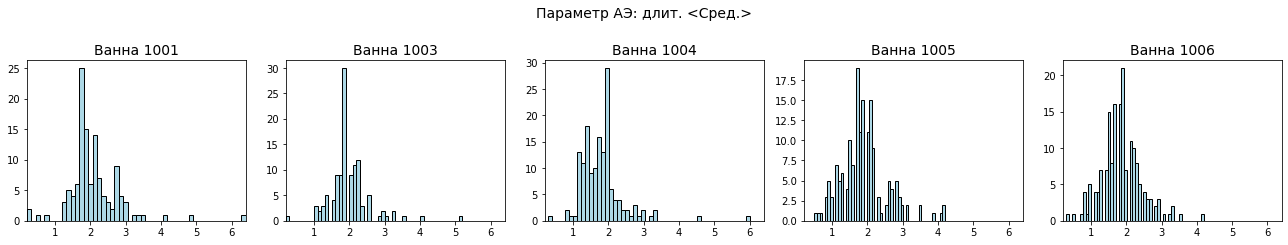

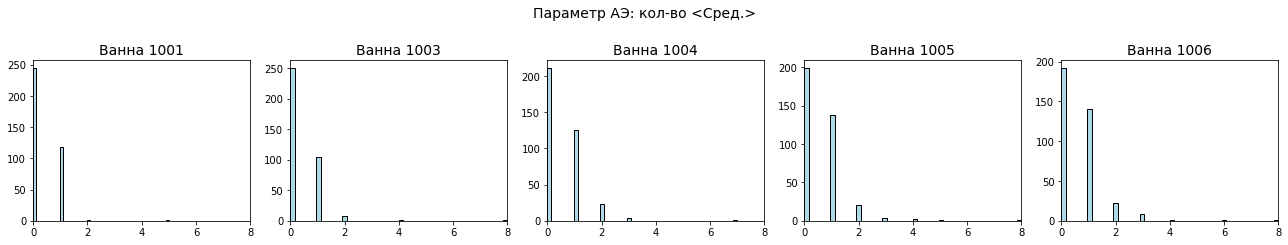

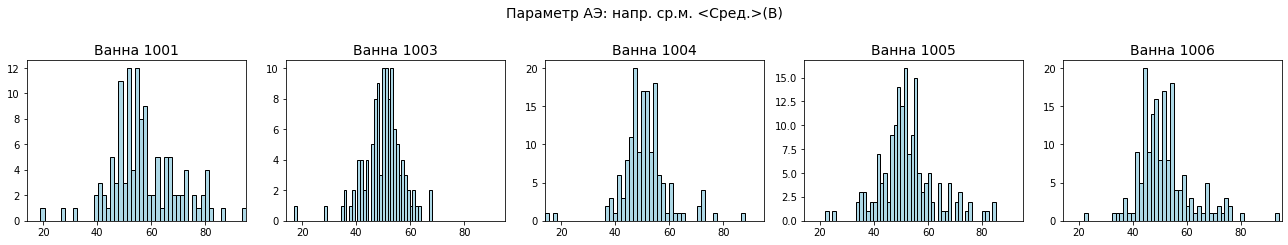

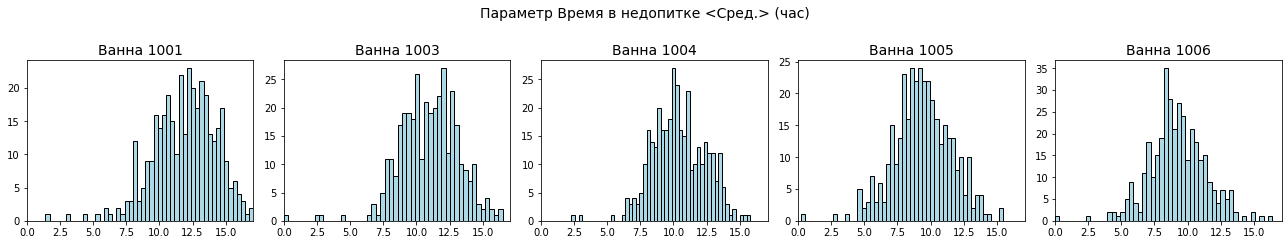

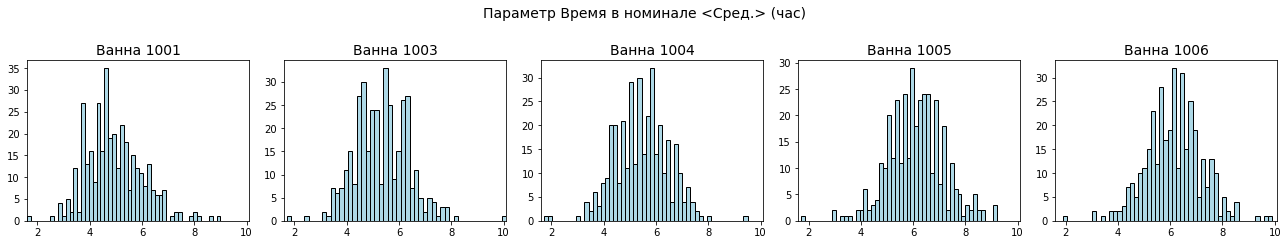

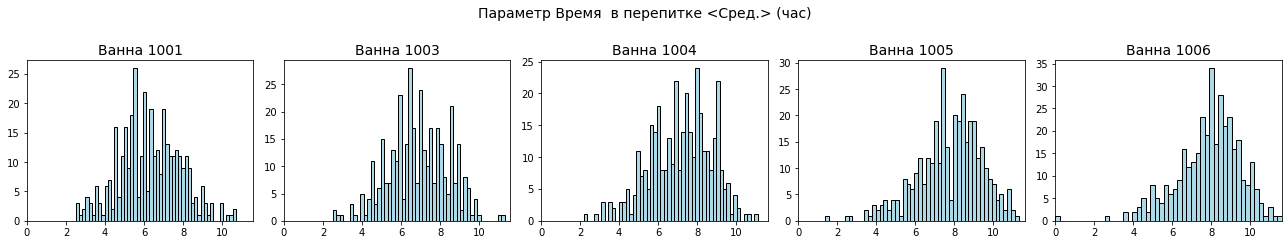

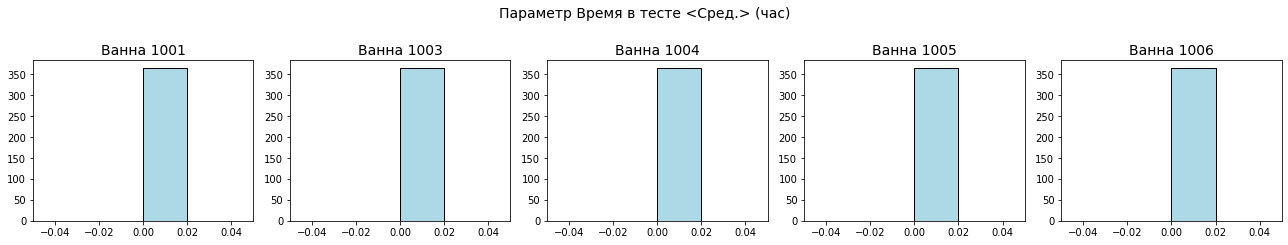

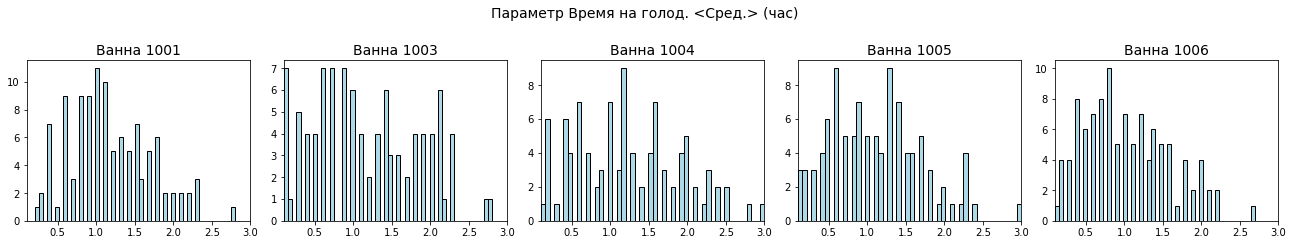

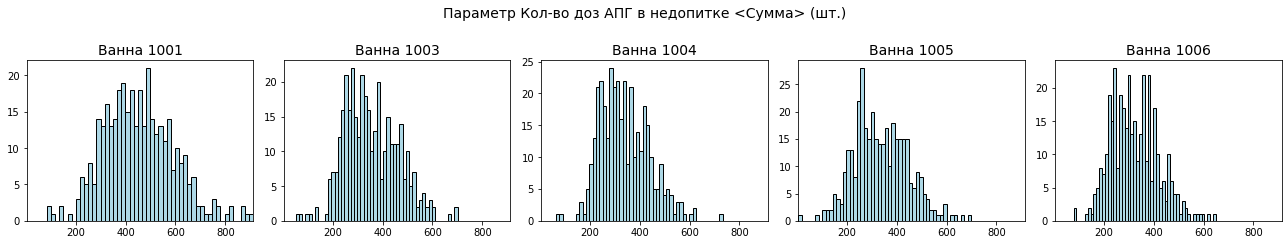

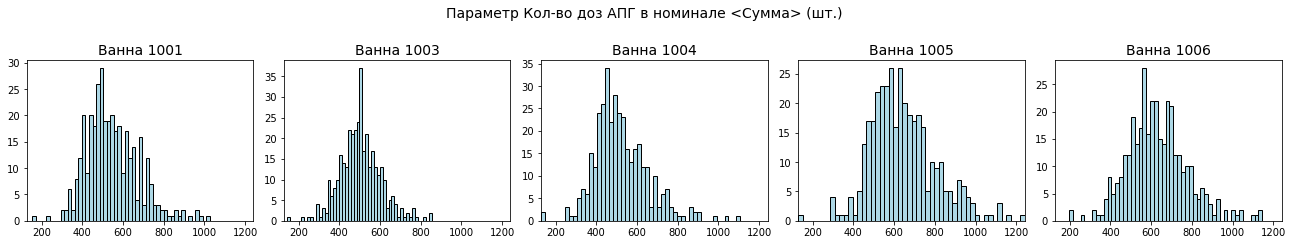

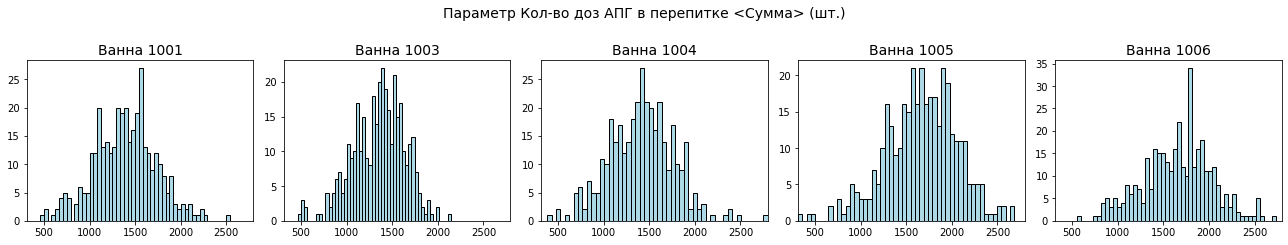

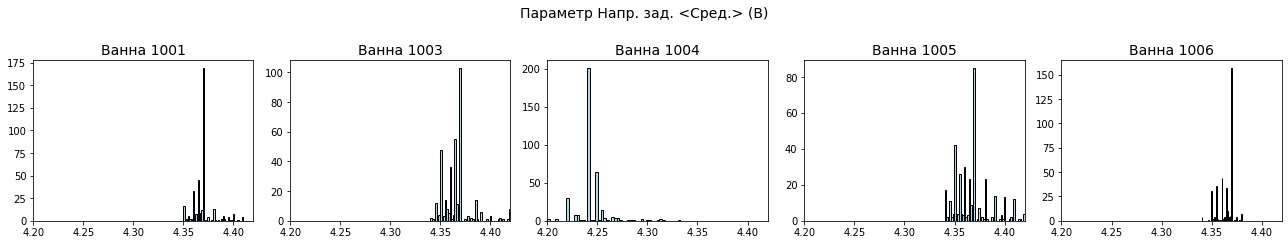

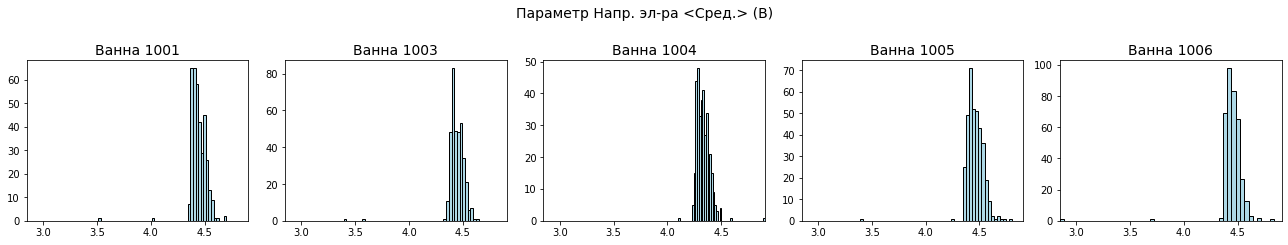

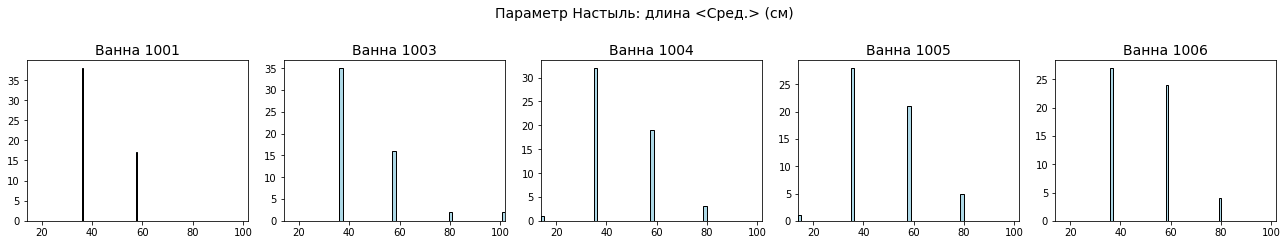

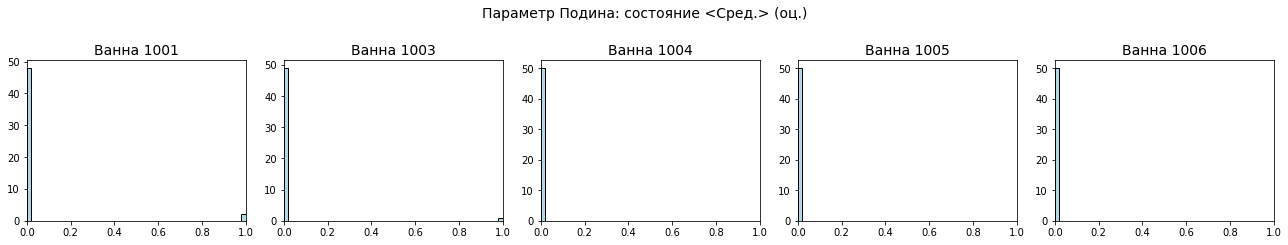

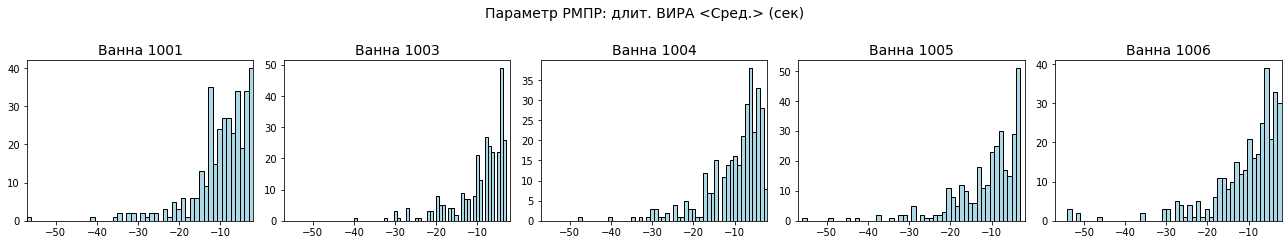

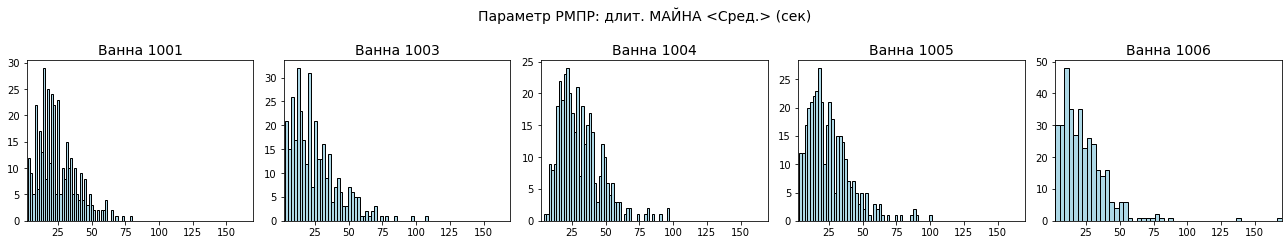

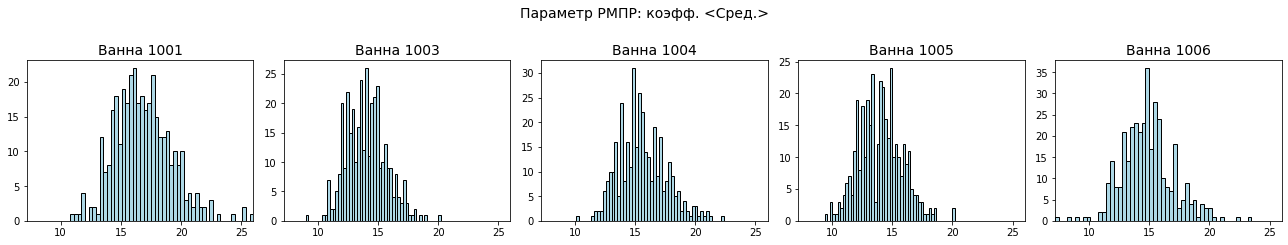

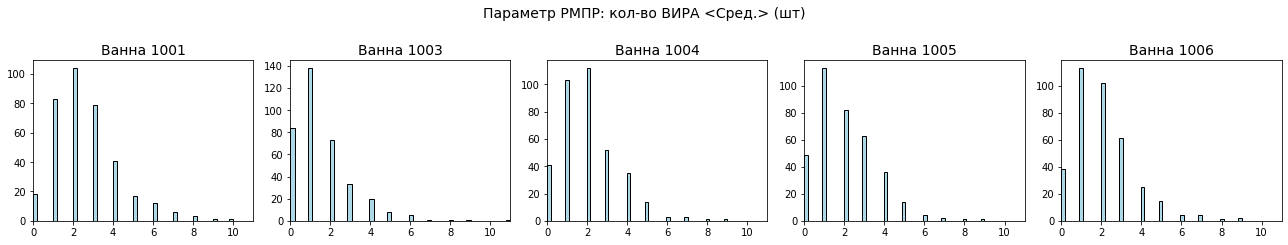

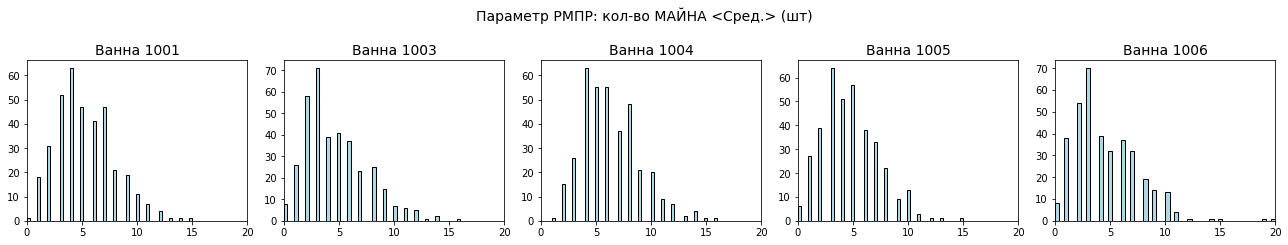

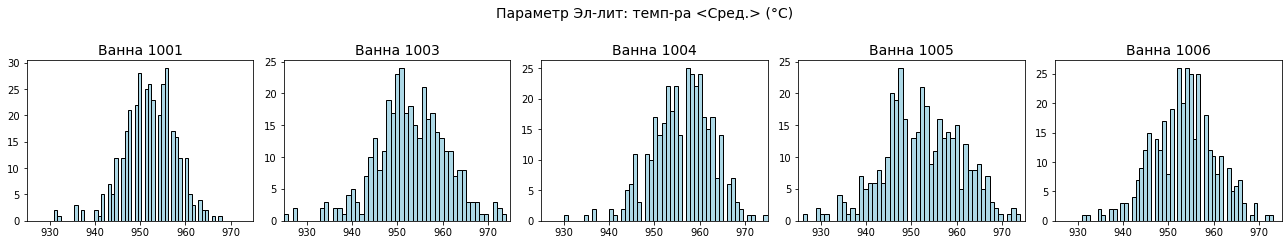

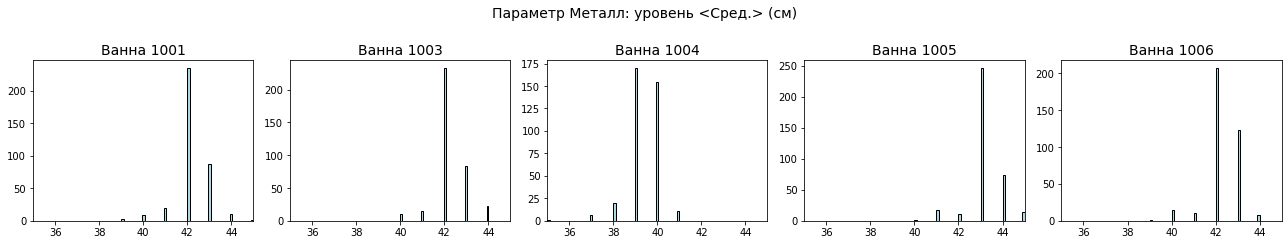

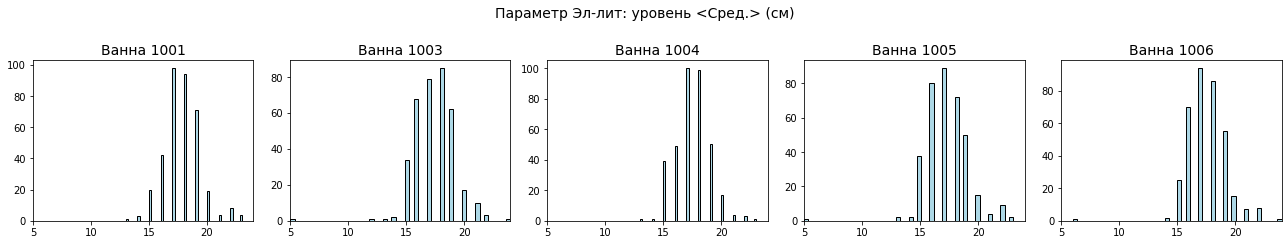

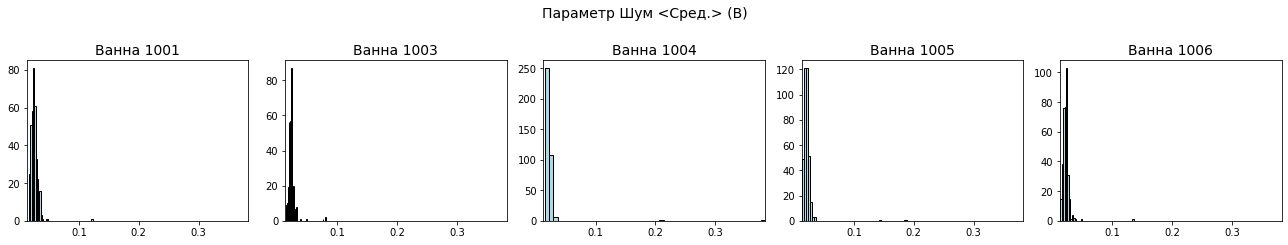

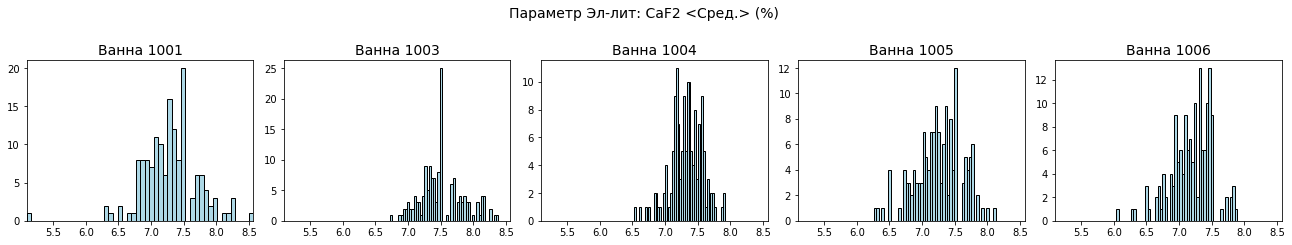

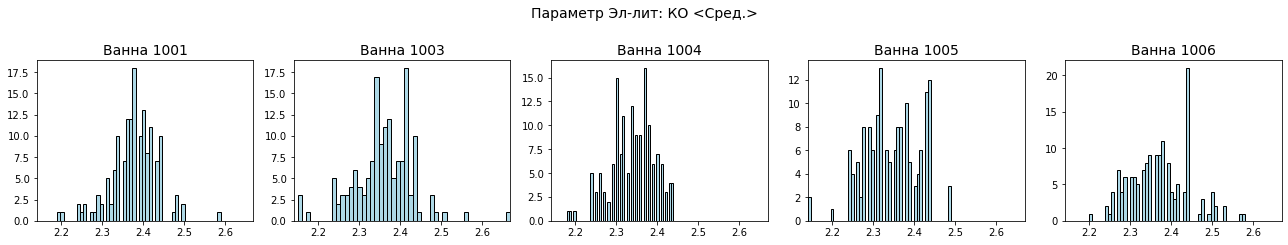

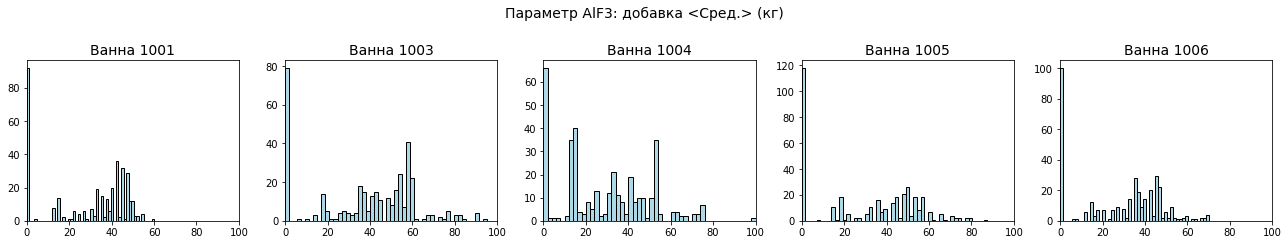

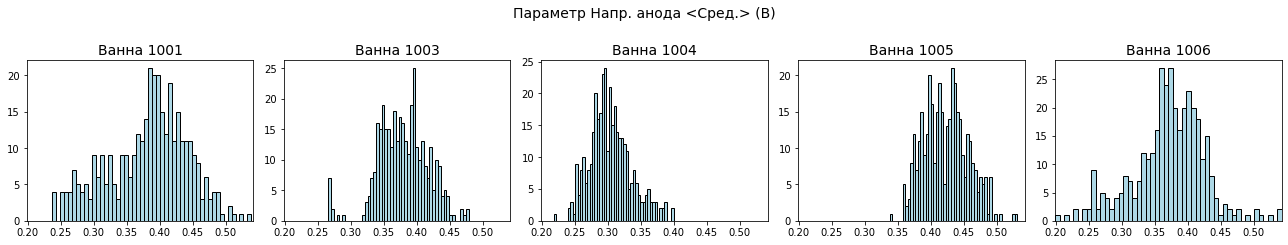

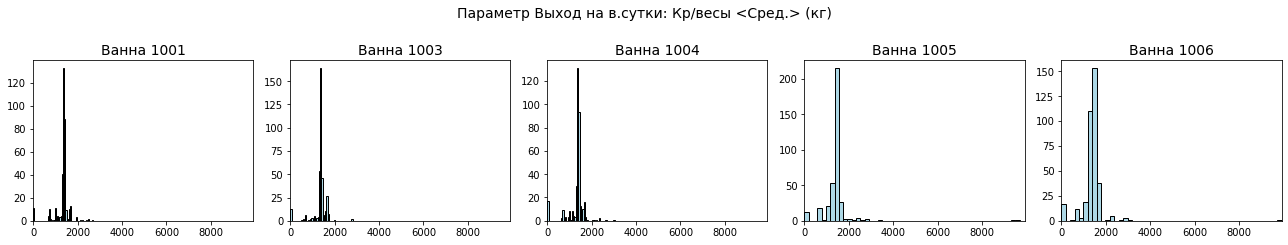

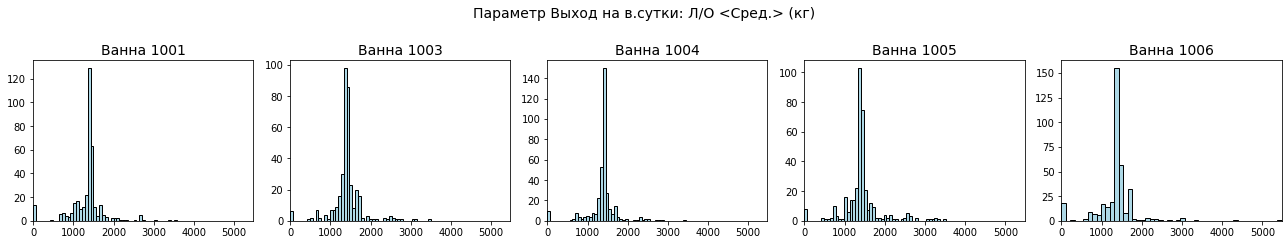

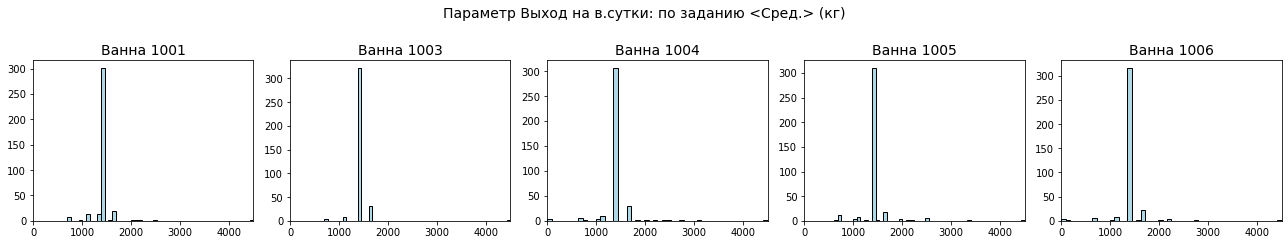

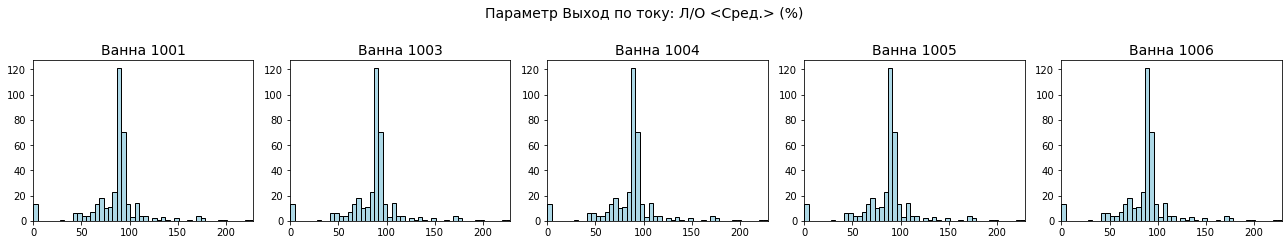

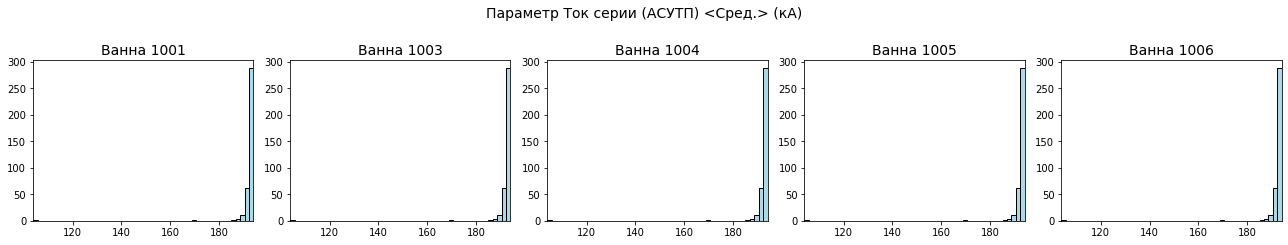

In [29]:
counts=0
for param in paramNames:
    fig, axs = plt.subplots(ncols=5, figsize=(18,3))
    minArr=[]
    maxArr=[]
    for i in range(5):
        minArr.append( data[i][param].min() )
        maxArr.append( data[i][param].max() )
    for i in range(5):
        axs[i].hist(data[i][param], bins=50, ec='black', color='lightblue')
        axs[i].set_title('Ванна '+bathNumber[i], fontsize=14)
        axs[i].set_xlim(np.min(minArr),np.max(maxArr))
    fig.suptitle('Параметр '+fullNamesInRussian[paramNames.index(param)], y=1.12, fontsize=14)
    plt.tight_layout()
    fileNameSavePics='report_v2/histParam'+str(counts+1)+'.png'
    plt.savefig(fileNameSavePics, dpi=300, bbox_inches='tight')
    plt.show()
    counts+=1

<hr>

# диапазоны изменения параметров

In [30]:
minValues=pd.DataFrame()
maxValues=pd.DataFrame()
for i in range(5):
    if i==0:
        minValues=data[i].describe().loc[['min']].copy().T
        minValues.columns.values[i]=bathNumber[i]  
        maxValues=data[i].describe().loc[['max']].copy().T
        maxValues.columns.values[i]=bathNumber[i]          
    else:
        minValues[bathNumber[i]]=data[i].describe().loc[['min']].T  
        maxValues[bathNumber[i]]=data[i].describe().loc[['max']].T  

In [35]:
minValues.index=fullNamesInRussian
minValues

1001     1003     1004     1005  \
АЭ: длит. <Сред.>                            0.200    0.200    0.300    0.500   
АЭ: кол-во <Сред.>                           0.000    0.000    0.000    0.000   
АЭ: напр. ср.м. <Сред.>(В)                  19.000   17.000   14.000   22.000   
Время в недопитке <Сред.> (час)              1.400    0.000    2.300    0.200   
Время в номинале <Сред.> (час)               1.600    1.700    1.700    1.700   
Время  в перепитке <Сред.> (час)             2.500    2.500    2.200    1.400   
Время в тесте <Сред.> (час)                  0.000    0.000    0.000    0.000   
Время на голод. <Сред.> (час)                0.200    0.100    0.100    0.100   
Кол-во доз АПГ в недопитке <Сумма> (шт.)    84.000   51.000   64.000    4.000   
Кол-во доз АПГ в номинале <Сумма> (шт.)    154.000  142.000  128.000  130.000   
Кол-во доз АПГ в перепитке <Сумма> (шт.)   458.000  466.000  381.000  314.000   
Напр. зад. <Сред.> (В)                       4.350    4.340    4.200    4.340   
Напр. эл-ра <Сред.> (В)                      3.510    3.392    4.098    3.388   
Настыль: длина <Сред.> (см)                 36.000   36.000   14.000   14.000   
Подина: состояние <Сред.> (оц.)              0.000    0.000    0.000    0.000   
РМПР: длит. ВИРА <Сред.> (сек)             -57.000  -40.000  -48.000  -56.000   
РМПР: длит. МАЙНА <Сред.> (сек)              3.000    3.000    4.000    3.000   
РМПР: коэфф. <Сред.>                        10.800    9.000   10.100    9.400   
РМПР: кол-во ВИРА <Сред.> (шт)               0.000    0.000    0.000    0.000   
РМПР: кол-во МАЙНА <Сред.> (шт)              0.000    0.000    1.000    0.000   
Эл-лит: темп-ра <Сред.> (°C)               931.000  925.000  930.000  926.000   
Металл: уровень <Сред.> (см)                39.000   40.000   35.000   40.000   
Эл-лит: уровень <Сред.> (см)                13.000    5.000   13.000    5.000   
Шум <Сред.> (В)                              0.017    0.015    0.015    0.013   
Эл-лит: CaF2 <Сред.> (%)                     5.100    6.720    6.520    6.260   
Эл-лит: КО <Сред.>                           2.190    2.150    2.180    2.140   
AlF3: добавка <Сред.> (кг)                   0.000    0.000    0.000    0.000   
Напр. анода <Сред.> (В)                      0.237    0.266    0.218    0.338   
Выход на в.сутки: Кр/весы <Сред.> (кг)       0.000    0.000    0.000    0.000   
Выход на в.сутки: Л/О <Сред.> (кг)           0.000    0.000    0.000    0.000   
Выход на в.сутки: по заданию <Сред.> (кг)  700.000  690.000    0.000  600.000   
Выход по току: Л/О <Сред.> (%)               0.000    0.000    0.000    0.000   
Ток серии (АСУТП) <Сред.> (кА)             103.900  103.900  103.900  103.900   

                                              1006  
АЭ: длит. <Сред.>                            0.300  
АЭ: кол-во <Сред.>                           0.000  
АЭ: напр. ср.м. <Сред.>(В)                  22.000  
Время в недопитке <Сред.> (час)              0.000  
Время в номинале <Сред.> (час)               1.900  
Время  в перепитке <Сред.> (час)             0.000  
Время в тесте <Сред.> (час)                  0.000  
Время на голод. <Сред.> (час)                0.100  
Кол-во доз АПГ в недопитке <Сумма> (шт.)    78.000  
Кол-во доз АПГ в номинале <Сумма> (шт.)    196.000  
Кол-во доз АПГ в перепитке <Сумма> (шт.)   558.000  
Напр. зад. <Сред.> (В)                       4.340  
Напр. эл-ра <Сред.> (В)                      2.849  
Настыль: длина <Сред.> (см)                 36.000  
Подина: состояние <Сред.> (оц.)              0.000  
РМПР: длит. ВИРА <Сред.> (сек)             -54.000  
РМПР: длит. МАЙНА <Сред.> (сек)              2.000  
РМПР: коэфф. <Сред.>                         7.200  
РМПР: кол-во ВИРА <Сред.> (шт)               0.000  
РМПР: кол-во МАЙНА <Сред.> (шт)              0.000  
Эл-лит: темп-ра <Сред.> (°C)               931.000  
Металл: уровень <Сред.> (см)                39.000  
Эл-лит: уровень <Сред.> (см)                 6.000  
Шум <Сред.> (В)    

In [36]:
maxValues.index=fullNamesInRussian
maxValues

1001      1003      1004  \
АЭ: длит. <Сред.>                             6.400     5.200     6.000   
АЭ: кол-во <Сред.>                            5.000     8.000     7.000   
АЭ: напр. ср.м. <Сред.>(В)                   95.000    68.000    88.000   
Время в недопитке <Сред.> (час)              17.100    16.500    15.800   
Время в номинале <Сред.> (час)                9.000    10.100     9.500   
Время  в перепитке <Сред.> (час)             10.700    11.300    11.100   
Время в тесте <Сред.> (час)                   0.000     0.000     0.000   
Время на голод. <Сред.> (час)                 2.800     2.800     3.000   
Кол-во доз АПГ в недопитке <Сумма> (шт.)    913.000   701.000   733.000   
Кол-во доз АПГ в номинале <Сумма> (шт.)    1026.000   856.000  1108.000   
Кол-во доз АПГ в перепитке <Сумма> (шт.)   2542.000  2149.000  2797.000   
Напр. зад. <Сред.> (В)                        4.410     4.420     4.333   
Напр. эл-ра <Сред.> (В)                       4.702     4.645     4.907   
Настыль: длина <Сред.> (см)                  58.000   102.000    80.000   
Подина: состояние <Сред.> (оц.)               1.000     1.000     0.000   
РМПР: длит. ВИРА <Сред.> (сек)               -2.000    -3.000    -2.000   
РМПР: длит. МАЙНА <Сред.> (сек)              80.000   109.000    97.000   
РМПР: коэфф. <Сред.>                         26.000    20.200    22.400   
РМПР: кол-во ВИРА <Сред.> (шт)               10.000    11.000     9.000   
РМПР: кол-во МАЙНА <Сред.> (шт)              15.000    16.000    16.000   
Эл-лит: темп-ра <Сред.> (°C)                968.000   974.000   975.000   
Металл: уровень <Сред.> (см)                 45.000    44.000    41.000   
Эл-лит: уровень <Сред.> (см)                 23.000    24.000    23.000   
Шум <Сред.> (В)                               0.123     0.081     0.383   
Эл-лит: CaF2 <Сред.> (%)                      8.570     8.380     7.920   
Эл-лит: КО <Сред.>                            2.590     2.670     2.440   
AlF3: добавка <Сред.> (кг)                   60.000    95.000   100.000   
Напр. анода <Сред.> (В)                       0.539     0.479     0.400   
Выход на в.сутки: Кр/весы <Сред.> (кг)     2690.000  2810.000  3040.000   
Выход на в.сутки: Л/О <Сред.> (кг)         3570.000  3510.000  3450.000   
Выход на в.сутки: по заданию <Сред.> (кг)  4500.000  4500.000  4500.000   
Выход по току: Л/О <Сред.> (%)              228.700   228.700   228.700   
Ток серии (АСУТП) <Сред.> (кА)              194.100   194.100   194.100   

                                               1005      1006  
АЭ: длит. <Сред.>                             4.200     4.200  
АЭ: кол-во <Сред.>                            8.000     8.000  
АЭ: напр. ср.м. <Сред.>(В)                   85.000    94.000  
Время в недопитке <Сред.> (час)              15.500    16.400  
Время в номинале <Сред.> (час)                9.200     9.900  
Время  в перепитке <Сред.> (час)             11.300    11.600  
Время в тесте <Сред.> (час)                   0.000     0.000  
Время на голод. <Сред.> (час)                 3.000     2.700  
Кол-во доз АПГ в недопитке <Сумма> (шт.)    698.000   649.000  
Кол-во доз АПГ в номинале <Сумма> (шт.)    1241.000  1146.000  
Кол-во доз АПГ в перепитке <Сумма> (шт.)   2686.000  2733.000  
Напр. зад. <Сред.> (В)                        4.420     4.380  
Напр. эл-ра <Сред.> (В)                       4.801     4.839  
Настыль: длина <Сред.> (см)                  80.000    80.000  
Подина: состояние <Сред.> (оц.)               0.000     0.000  
РМПР: длит. ВИРА <Сред.> (сек)               -3.000    -2.000  
РМПР: длит. МАЙНА <Сред.> (сек)             101.000   170.000  
РМПР: коэфф. <Сред.>                         20.200    23.500  
РМПР: кол-во ВИРА <Сред.> (шт)                9.000     9.000  
РМПР: кол-во МАЙНА <Сред.> (шт)              15.000    20.000  
Эл-лит: темп-ра <Сред.> (°C)                974.000   973.000  
Металл: уровень <Сред.> (см)                 45.000    44.000  
Эл-лит: уровень <Сред.> 

In [37]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\describeDataRanges.xlsx', engine='xlsxwriter')
minValues.to_excel(writer, sheet_name='минимальные значения')
maxValues.to_excel(writer, sheet_name='максимальные значения')
writer.save()

<hr>

In [38]:
# Анализ коэффициентов корреляции между входными параметрами и выходными (ETEMP, EKO)
corrETEMP=[]
corrEKO=[]
for i in range(5):
    corrETEMP.append(data[i].drop(columns=['ETEMP', 'EKO']).corrwith(data[i]['ETEMP']))
    corrEKO.append(data[i].drop(columns=['ETEMP', 'EKO']).corrwith(data[i]['EKO']))

In [94]:
# выполнить если надо сохранить в файл
import sys
sys.stdout=open('report_v2\\correlationsReports.txt',"w")

In [95]:
print("Очень сильные корреляции")
print("=======================================")
for i in range(5):
    print("Очень сильные корреляции в наборе ", bathNumber[i])
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('EKO')],'|p|=(0.80, 1.00) :')
    tmp=corrEKO[i][ (corrEKO[i]<=-0.80) | (corrEKO[i]>=0.80) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])  
    print('---------------------------')    
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('ETEMP')],'|p|=(0.80, 1.00) :')
    tmp=corrETEMP[i][ (corrETEMP[i]<=-0.80) | (corrETEMP[i]>=0.80) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])  
    print('\n')

In [96]:
print("Cильные корреляции")
print("=======================================")
for i in range(5):
    print("Сильные корреляции в наборе ", bathNumber[i])
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('EKO')],'|p|=(0.60, 0.80):')
    tmp=corrEKO[i][ ((corrEKO[i]>-0.8)&(corrEKO[i]<=-0.6)) | ((corrEKO[i]>=0.6)&(corrEKO[i]<0.8)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])  
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('ETEMP')],'|p|=(0.60, 0.80):')
    tmp=corrETEMP[i][ ((corrETEMP[i]>-0.8)&(corrETEMP[i]<=-0.6)) | ((corrETEMP[i]>=0.6)&(corrETEMP[i]<0.8)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])  
    print('\n')

In [97]:
print("Средние корреляции")
print("=======================================")
for i in range(5):
    print("Средние корреляции в наборе ", bathNumber[i])
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('EKO')],'|p|=(0.40, 0.60):')
    tmp=corrEKO[i][ ((corrEKO[i]>-0.60)&(corrEKO[i]<=-0.4)) | ((corrEKO[i]>=0.4)&(corrEKO[i]<0.6))  ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('ETEMP')],'|p|=(0.40, 0.60):')
    tmp=corrETEMP[i][ ((corrETEMP[i]>-0.6)&(corrETEMP[i]<=-0.4)) | ((corrETEMP[i]>=0.4)&(corrETEMP[i]<0.6)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])
    print('\n')

In [98]:
print("Слабые корреляции")
print("=======================================")
for i in range(5):
    print("Слабые корреляции в наборе ", bathNumber[i])
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('EKO')],'|p|=(0.20, 0.40):')
    tmp=corrEKO[i][ ((corrEKO[i]>-0.4)&(corrEKO[i]<=-0.2)) | ((corrEKO[i]>=0.2)&(corrEKO[i]<0.4))  ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])
    print('---------------------------')
    print('Коэффициент корреляции Пирсона для', fullNamesInRussian[paramNames.index('ETEMP')],'|p|=(0.20, 0.40):')
    tmp=corrETEMP[i][ ((corrETEMP[i]>-0.4)&(corrETEMP[i]<=-0.2)) | ((corrETEMP[i]>=0.2)&(corrETEMP[i]<0.4)) ]
    if len(tmp)==0:
        print('нет корреляций')
    else:
        for j in range(len(tmp)):
            print(fullNamesInRussian[paramNames.index(tmp.index.to_list()[j])],' коэффициент корреляции =',tmp[j])
    print('\n')

In [99]:
# выполнить если было начато сохранение в файл
sys.stdout.close()

## Уберем записи или столбцы с пропусками

In [10]:
dropNanValues=data[0].copy()

In [11]:
dropNanValuesRowsEKO=dropNanValues.drop(columns=['ETEMP'])
dropNanValuesRowsEKO=dropNanValuesRowsEKO.dropna(axis=0)
dropNanValuesRowsEKO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 29 to 323
Data columns (total 32 columns):
AE1         12 non-null float64
AE2         12 non-null int64
AE3         12 non-null float64
TIME1       12 non-null float64
TIME2       12 non-null float64
TIME3       12 non-null float64
TIME4       12 non-null int64
TIME5       12 non-null float64
KOL1        12 non-null int64
KOL2        12 non-null int64
KOL3        12 non-null int64
U1          12 non-null float64
U2          12 non-null float64
NAST        12 non-null float64
POD         12 non-null float64
RMPR1       12 non-null float64
RMPR2       12 non-null float64
RMPR3       12 non-null float64
RMPR4       12 non-null int64
RMPR5       12 non-null int64
METAL       12 non-null float64
ELEVEL      12 non-null float64
NOISE       12 non-null float64
ERATE       12 non-null float64
EKO         12 non-null float64
AIF3        12 non-null float64
UANOD       12 non-null float64
NETOUT1     12 non-null int64
NETOUT2     12 

In [12]:
dropNanValuesRowsETEMP=dropNanValues.drop(columns=['EKO'])
dropNanValuesRowsETEMP=dropNanValuesRowsETEMP.dropna(axis=0)
dropNanValuesRowsETEMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 29 to 323
Data columns (total 32 columns):
AE1         12 non-null float64
AE2         12 non-null int64
AE3         12 non-null float64
TIME1       12 non-null float64
TIME2       12 non-null float64
TIME3       12 non-null float64
TIME4       12 non-null int64
TIME5       12 non-null float64
KOL1        12 non-null int64
KOL2        12 non-null int64
KOL3        12 non-null int64
U1          12 non-null float64
U2          12 non-null float64
NAST        12 non-null float64
POD         12 non-null float64
RMPR1       12 non-null float64
RMPR2       12 non-null float64
RMPR3       12 non-null float64
RMPR4       12 non-null int64
RMPR5       12 non-null int64
ETEMP       12 non-null float64
METAL       12 non-null float64
ELEVEL      12 non-null float64
NOISE       12 non-null float64
ERATE       12 non-null float64
AIF3        12 non-null float64
UANOD       12 non-null float64
NETOUT1     12 non-null int64
NETOUT2     12 

Только 12 записей из 365 содержат все заполненые значения

In [14]:
dropNanValuesColumns=dropNanValues.dropna(axis=1)
print('Столбцы без пропусков (',len(dropNanValuesColumns.info()),' шт)')
dropNanValuesColumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
AE2         365 non-null int64
TIME1       365 non-null float64
TIME2       365 non-null float64
TIME3       365 non-null float64
TIME4       365 non-null int64
KOL1        365 non-null int64
KOL2        365 non-null int64
KOL3        365 non-null int64
U1          365 non-null float64
U2          365 non-null float64
RMPR3       365 non-null float64
RMPR4       365 non-null int64
RMPR5       365 non-null int64
NOISE       365 non-null float64
UANOD       365 non-null float64
NETOUT1     365 non-null int64
NETOUT2     365 non-null int64
NETOUT3     365 non-null int64
CURRENT1    365 non-null float64
CURRENT2    365 non-null float64
dtypes: float64(10), int64(10)
memory usage: 57.2 KB


TypeError: object of type 'NoneType' has no len()

## Если удалить неполные столбцы, остается всего 13 параметров из 33, неполными являются также целевые показатели.
## Если удалять записи, оталется 12 наблюдений из 365.
## Выводы. Требуется заполнять пропуски.

<hr>

# Анализ целевых параметров

In [21]:
dataEKO=[]
dataETEMP=[]
for i in range(5):
    dataEKO.append(data[i]['EKO'])
    dataETEMP.append(data[i]['ETEMP'])

In [22]:
dataEKO=pd.DataFrame(dataEKO).T
dataEKO.columns=bathNumber
dataETEMP=pd.DataFrame(dataETEMP).T
dataETEMP.columns=bathNumber

In [23]:
dataEKO.describe()

1001        1003        1004        1005        1006
count  152.000000  153.000000  151.000000  151.000000  155.000000
mean     2.376250    2.358693    2.339735    2.346225    2.371290
std      0.056437    0.071944    0.054295    0.067584    0.071973
min      2.190000    2.150000    2.180000    2.140000    2.200000
25%      2.350000    2.320000    2.300000    2.300000    2.320000
50%      2.380000    2.360000    2.340000    2.350000    2.370000
75%      2.410000    2.410000    2.380000    2.400000    2.430000
max      2.590000    2.670000    2.440000    2.490000    2.580000

In [24]:
dataETEMP.describe()

1001        1003        1004        1005        1006
count  364.000000  364.000000  364.000000  364.000000  364.000000
mean   952.046703  953.101648  956.057692  952.423077  953.392857
std      5.710221    7.932435    6.544568    8.507143    6.991301
min    931.000000  925.000000  930.000000  926.000000  931.000000
25%    949.000000  948.000000  952.000000  947.000000  949.000000
50%    952.000000  953.000000  957.000000  952.000000  954.000000
75%    956.000000  958.000000  960.250000  959.000000  958.000000
max    968.000000  974.000000  975.000000  974.000000  973.000000

In [29]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\describeTargetDataBasicStats.xlsx', engine='xlsxwriter')
dataEKO.describe().to_excel(writer, sheet_name='Эл-лит КО cред.')
dataETEMP.describe().to_excel(writer, sheet_name='Эл-лит темп-ра cред.')
writer.save()

In [34]:
bathNumber=['1001','1003','1004','1005','1006']
tickNames=[]
for b in bathNumber:
    tickNames.append('Ванна\n'+b)
tickNames

['Ванна\n1001', 'Ванна\n1003', 'Ванна\n1004', 'Ванна\n1005', 'Ванна\n1006']

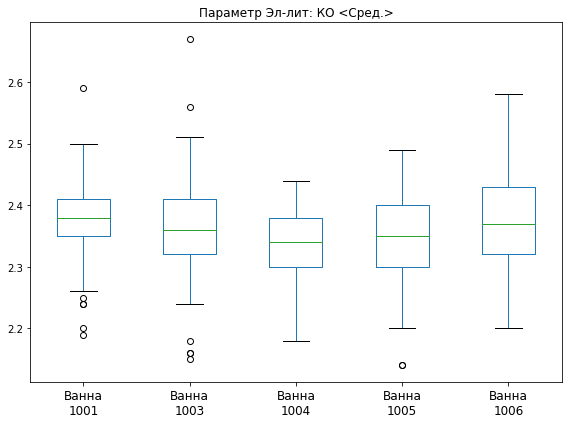

In [48]:
fig = plt.figure(figsize=(8,6))
ax=dataEKO.boxplot(grid=False)
ax.set_xticklabels(tickNames, fontsize=12)
ax.set_title('Параметр '+fullNamesInRussian[paramNames.index('EKO')], fontsize=12)
plt.tight_layout()
plt.savefig('report_v2\ekoBoxPlots.png', dpi=300, bbox_inches='tight')
plt.show()

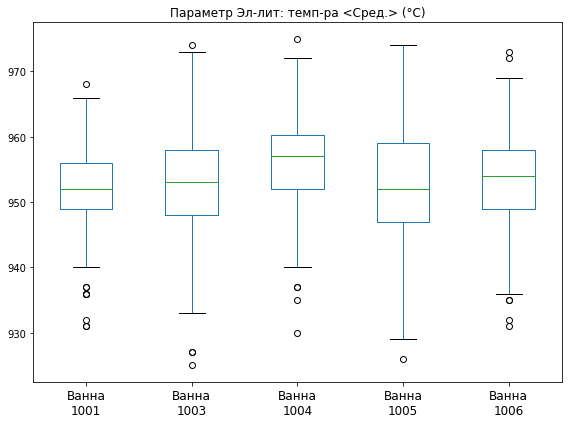

In [49]:
fig = plt.figure(figsize=(8,6))
ax=dataETEMP.boxplot(grid=False)
ax.set_xticklabels(tickNames, fontsize=12)
ax.set_title('Параметр '+fullNamesInRussian[paramNames.index('ETEMP')], fontsize=12)
plt.tight_layout()
plt.savefig('report_v2\etempBoxPlots.png', dpi=300, bbox_inches='tight')
plt.show()